In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../data/playersgrouped.csv')

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_7136\1913970732.py:1: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/playersgrouped.csv')


In [3]:
df = df.drop(['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket'], axis=1)

In [4]:
df.head(20)

,id,matchid,player,championid,ss1,ss2,role,win,kills,deaths,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills_y,baronkills,dragonkills,harrykills
0,9,10,1,Warwick,Flash,Smite,JUNGLE,0.0,6.0,10.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,10,10,2,Nami,Exhaust,Flash,SUPPORT,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,11,10,3,Draven,Heal,Flash,ADC,0.0,7.0,8.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
3,12,10,4,Fiora,Teleport,Flash,TOP,0.0,5.0,11.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,13,10,5,Viktor,Flash,Exhaust,MID,0.0,2.0,8.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
5,14,10,6,Skarner,Smite,Flash,JUNGLE,1.0,3.0,3.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
6,15,10,7,Galio,Flash,Teleport,TOP,1.0,4.0,5.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
7,16,10,8,Ahri,Ignite,Flash,MID,1.0,13.0,4.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
8,17,10,9,Jinx,Heal,Flash,ADC,1.0,15.0,3.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
9,18,10,10,VelKoz,Ignite,Flash,SUPPORT,1.0,4.0,5.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0


In [5]:
df.describe()

,id,matchid,player,win,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills_y,baronkills,dragonkills,harrykills
count,1.733653e+06,1.733653e+06,1.733653e+06,1733653.0,1.733653e+06,1.733653e+06,1.733653e+06,1.733653e+06,1.733653e+06,1.733653e+06,...,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06,1.713967e+06
mean,9.253377e+05,9.291897e+04,5.491578e+00,0.5,5.783338e+00,5.806344e+00,8.273763e+00,2.662607e+00,1.330362e+00,1.336112e+00,...,4.921524e-01,4.623590e-01,3.231562e-01,4.837544e-01,2.390886e-01,5.823718e+00,1.050350e+00,4.195087e-01,1.447880e+00,2.390886e-01
std,5.252794e+05,5.283223e+04,2.871292e+00,0.5,4.604124e+00,3.265928e+00,5.909089e+00,2.527495e+00,7.586115e-01,1.261017e+00,...,4.999386e-01,4.985813e-01,4.676819e-01,4.997362e-01,4.265271e-01,3.851845e+00,1.262619e+00,6.092010e-01,1.228506e+00,4.265271e-01
min,9.000000e+00,1.000000e+01,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.742620e+05,4.755700e+04,3.000000e+00,0.0,2.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.093050e+05,9.117100e+04,5.000000e+00,0.0,5.000000e+00,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.345802e+06,1.351780e+05,8.000000e+00,1.0,8.000000e+00,8.000000e+00,1.100000e+01,4.000000e+00,2.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
max,1.862704e+06,1.872980e+05,1.000000e+01,1.0,4.500000e+01,3.800000e+01,5.700000e+01,3.500000e+01,6.000000e+00,1.300000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.300000e+01,5.000000e+00,7.000000e+00,1.000000e+00


In [6]:
df.shape

(1733653, 66)

##### Data exploration

In [7]:
df.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role', 'win',
       'kills', 'deaths', 'assists', 'largestkillingspree', 'largestmultikill',
       'killingsprees', 'longesttimespentliving', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'legendarykills', 'totdmgdealt',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp',
       'totheal', 'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills',
       'inhibkills_x', 'totminionskilled', 'neutralminionskilled',
       'ownjunglekills', 'enemyjunglekills', 'totcctimedealt', 'champlvl',
       'pinksbought', 'wardsbought', 'wardsplaced', 'wardskilled',
       'firstblood_x', 'teamid', 'firstblood_y', 'firsttower', 'firstinhib',
       'firstbaron', 'firstdragon', 'firs

##### The categorical variables are transformed using one-hot encoding

In [8]:
df= pd.get_dummies(df, columns=['role'])
df= pd.get_dummies(df, columns=['championid'])
df= pd.get_dummies(df, columns=['ss1'])
df= pd.get_dummies(df, columns=['ss2'])

##### NA values problem

In [9]:
df.replace('\\N', pd.NA, inplace=True)

In [10]:
df.fillna(0, inplace=True)

In [11]:
explanatory_variables = [c for c in df.columns if c != "win"]
target_variable = "win"

In [12]:
X = df[explanatory_variables]
y = df[target_variable]

## Model 1
### The Gradient Boosting Classifier model is trained with a 20% test split, given that the dataset is sufficiently large.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1386922, 220)
X_test shape: (346731, 220)
y_train shape: (1386922,)
y_test shape: (346731,)


In [15]:
model1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, 
                                     max_depth=3, random_state=42)

In [16]:
model1.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,20
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [17]:
y_pred = model1.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test,y_pred)

In [19]:
accuracy,precision,recall

(0.9352437480352204, 0.9358742837298142, 0.9342790281108254)

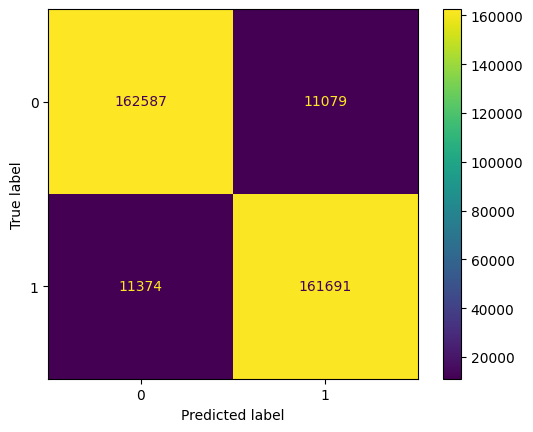

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### Feature importance

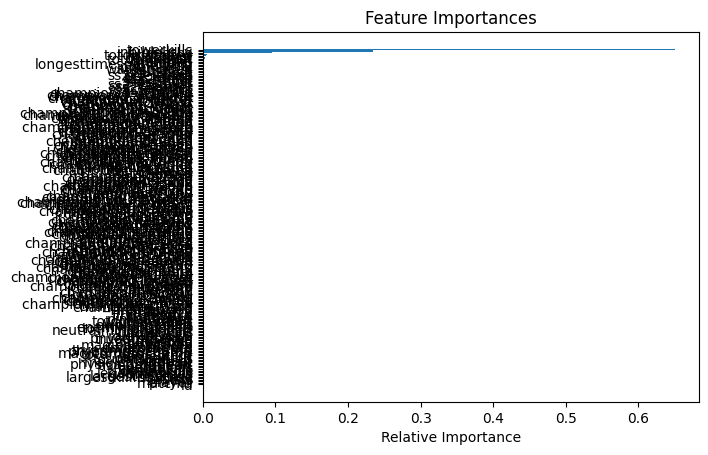

In [21]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], align='center')
plt.title("Feature Importances")
plt.yticks(range(len(indices)), [explanatory_variables[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [22]:
importances[indices]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [23]:
[explanatory_variables[i] for i in indices]

['id',
 'matchid',
 'player',
 'kills',
 'assists',
 'largestkillingspree',
 'largestmultikill',
 'killingsprees',
 'legendarykills',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'truedmgdealt',
 'physicaldmgdealt',
 'magicdmgdealt',
 'totheal',
 'totunitshealed',
 'dmgselfmit',
 'largestcrit',
 'totdmgtochamp',
 'magicdmgtochamp',
 'physdmgtochamp',
 'truedmgtochamp',
 'dmgtoturrets',
 'visionscore',
 'magicdmgtaken',
 'dmgtoobj',
 'turretkills',
 'goldearned',
 'truedmgtaken',
 'physdmgtaken',
 'role_JUNGLE',
 'harrykills',
 'role_ADC',
 'dragonkills',
 'neutralminionskilled',
 'totminionskilled',
 'enemyjunglekills',
 'ownjunglekills',
 'wardskilled',
 'wardsbought',
 'totcctimedealt',
 'pinksbought',
 'firstbaron',
 'firstblood_y',
 'teamid',
 'firstblood_x',
 'firstharry',
 'firstdragon',
 'baronkills',
 'championid_Bard',
 'championid_Azir',
 'championid_Aurelion Sol',
 'championid_Ashe',
 'championid_Annie',
 'championid_Anivia',
 'championid_Amumu',
 'champio

#### Champions do not have relative importance; the most important features for prediction according to the model are (in ascending order): 
'visionscore',
 'role_TOP',
 'firstdragon',
 'harrykills',
 'totdmgdealt',
 'firstbaron',
 'goldearned',
 'totdmgtaken',
 'dragonkills',
 'baronkills',
 'kda'

## Model 2
### We can further test the predictive capability of the model by removing kda, the most important feature, and observing how this affects the evaluation metrics.

In [24]:
excluded_columns = ['towerkills', 'inhibkills_y', 'firsttower', 'firstinhib','win','kda']
explanatory_variables = [c for c in df.columns if c not in excluded_columns]
target_variable = "win"

In [25]:
explanatory_variables

['id',
 'matchid',
 'player',
 'kills',
 'deaths',
 'assists',
 'largestkillingspree',
 'largestmultikill',
 'killingsprees',
 'longesttimespentliving',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'legendarykills',
 'totdmgdealt',
 'magicdmgdealt',
 'physicaldmgdealt',
 'truedmgdealt',
 'largestcrit',
 'totdmgtochamp',
 'magicdmgtochamp',
 'physdmgtochamp',
 'truedmgtochamp',
 'totheal',
 'totunitshealed',
 'dmgselfmit',
 'dmgtoobj',
 'dmgtoturrets',
 'visionscore',
 'totdmgtaken',
 'magicdmgtaken',
 'physdmgtaken',
 'truedmgtaken',
 'goldearned',
 'goldspent',
 'turretkills',
 'inhibkills_x',
 'totminionskilled',
 'neutralminionskilled',
 'ownjunglekills',
 'enemyjunglekills',
 'totcctimedealt',
 'champlvl',
 'pinksbought',
 'wardsbought',
 'wardsplaced',
 'wardskilled',
 'firstblood_x',
 'teamid',
 'firstblood_y',
 'firstbaron',
 'firstdragon',
 'firstharry',
 'baronkills',
 'dragonkills',
 'harrykills',
 'role_ADC',
 'role_JUNGLE',
 'role_MID',
 'role_SUPPORT',
 

In [26]:
X = df[explanatory_variables]
y = df[target_variable]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1386922, 216)
X_test shape: (346731, 216)
y_train shape: (1386922,)
y_test shape: (346731,)


In [29]:
model2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, 
                                     max_depth=3, random_state=42)

In [30]:
model2.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,20
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
y_pred = model2.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test,y_pred)

### We observe a lower predictive capability compared to Model 1. Nevertheless, given the information available about the matches, predicting the outcome is by no means straightforward for a human observer.

In [33]:
accuracy,precision,recall

(0.8560526748401499, 0.8538297994598633, 0.8585907029150897)

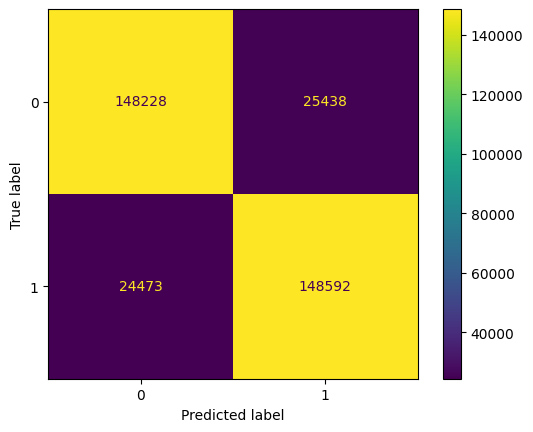

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

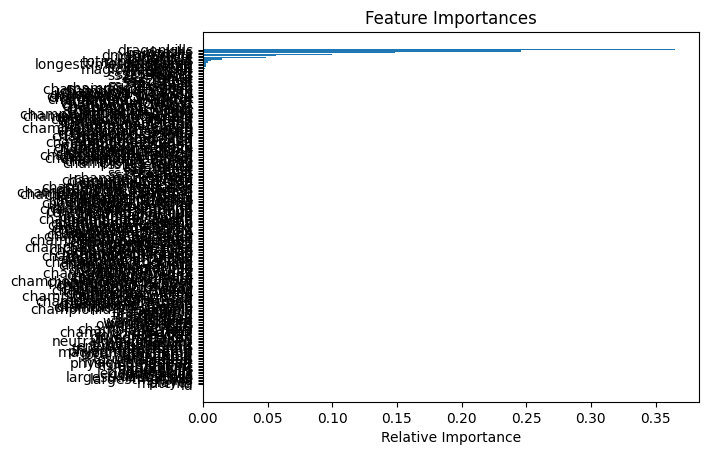

In [35]:
importances =model2.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], align='center')
plt.title("Feature Importances")
plt.yticks(range(len(indices)), [explanatory_variables[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [36]:
[explanatory_variables[i] for i in indices]

['id',
 'matchid',
 'player',
 'kills',
 'largestmultikill',
 'largestkillingspree',
 'doublekills',
 'killingsprees',
 'legendarykills',
 'pentakills',
 'triplekills',
 'quadrakills',
 'largestcrit',
 'truedmgdealt',
 'physicaldmgdealt',
 'magicdmgdealt',
 'totheal',
 'totunitshealed',
 'dmgselfmit',
 'dmgtoobj',
 'totdmgtochamp',
 'magicdmgtochamp',
 'physdmgtochamp',
 'truedmgtochamp',
 'visionscore',
 'enemyjunglekills',
 'totcctimedealt',
 'pinksbought',
 'neutralminionskilled',
 'goldearned',
 'truedmgtaken',
 'physdmgtaken',
 'role_SUPPORT',
 'role_TOP',
 'championid_Aatrox',
 'role_MID',
 'championid_Ahri',
 'role_JUNGLE',
 'role_ADC',
 'ownjunglekills',
 'wardsplaced',
 'wardsbought',
 'wardskilled',
 'firstharry',
 'firstdragon',
 'firstblood_y',
 'teamid',
 'firstblood_x',
 'harrykills',
 'championid_Cassiopeia',
 'championid_Camille',
 'championid_Caitlyn',
 'championid_Braum',
 'championid_Brand',
 'championid_Blitzcrank',
 'championid_Bard',
 'championid_Azir',
 'champion

## Conclusions

When structural variables are included, the accuracy, precision, and recall metrics all exceed 93%. When structural variables are excluded but kda is included, the metrics are approximately 85%. If both structural variables and kda are excluded, the metrics decrease to around 80%.

Data observations. The dataset contains an approximately equal number of won and lost matches (50-50), indicating that the obtained metrics are highly representative of the predictive capabilities of the models. This ensures that the model is not making random predictions or assigning wins and losses to matches without rationale.

